In [1]:
# singkronisasi ke g-drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Kunjungan ke Dokter Gigi dan Penjualan Makanan

#### [Membaca Dataset](https://academy.dqlab.id/main/livecode/371/792/4110?pr=0)

In [2]:
# import pandas sebagai aliasnya pd
import pandas as pd

In [3]:
# Baca dataset kunjungan_dokter_gigi_kota_x_dqlab.tsv sesuai dengan url yang diberikan
df_kunjungan = pd.read_csv("/content/drive/MyDrive/AL. Lab/Sanca/Datasets/kunjungan_dokter_gigi_kota_x_dqlab.tsv", sep="\t")

# Cetak ukuran dataset sehingga diketahui jumlah baris dan kolomnya
print("Ukuran df_kunjungan:", df_kunjungan.shape)

# Cetak data frame df_kunjungan
print(df_kunjungan)

Ukuran df_kunjungan: (24, 3)
    Bulan  Tahun  tingkat kunjungan ke dokter gigi
0       1   1996                                37
1       2   1996                                32
2       3   1996                                56
3       4   1996                                43
4       5   1996                                52
5       6   1996                                70
6       7   1996                                64
7       8   1996                                88
8       9   1996                                74
9      10   1996                                98
10     11   1996                                80
11     12   1996                                46
12      1   1997                                66
13      2   1997                                78
14      3   1997                                46
15      4   1997                                62
16      5   1997                               124
17      6   1997                               106
18

In [4]:
# Baca dataset tingkat_penjualan_kota_x_dqlab.tsv sesuai dengan url yang diberikan
df_penjualan = pd.read_csv("/content/drive/MyDrive/AL. Lab/Sanca/Datasets/tingkat_penjualan_kota_x_dqlab.tsv", sep="\t")

# Cetak ukuran dataset sehingga diketahui jumlah baris dan kolomnya
print("\n\nUkuran df_penjualan:", df_penjualan.shape)

# Cetak data frame df_penjualan
print(df_penjualan)



Ukuran df_penjualan: (24, 6)
    No  Bulan  Tahun  penjualan permen  penjualan sereal  \
0    1      1   1996            200661             10324   
1    2      2   1996            297141             13150   
2    3      3   1996            235586              5398   
3    4      4   1996            299498              7609   
4    5      5   1996            395824              5190   
5    6      6   1996            247212             14571   
6    7      7   1996            273899             13407   
7    8      8   1996            184405              8914   
8    9      9   1996            141211              3663   
9   10     10   1996            292225             14756   
10  11     11   1996            227864              3883   
11  12     12   1996            259963              5720   
12  13      1   1997            433783             16209   
13  14      2   1997            343034              5955   
14  15      3   1997            419255             14789   
15  16   

#### [Penggabungan Kolom Tahun dan Bulan](https://academy.dqlab.id/main/livecode/371/792/4112?pr=0)

In [5]:
# Gabungkan kolom Tahun dan Bulan menjadi kolom Periode dengan isi tiap barisnya memiliki format YYYY-MM 
str_bulan = lambda x: "0"+str(x) if x<10 else str(x)
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str_bulan)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str_bulan)

# Drop kolom Tahun, Bulan dari df_kunjungan
df_kunjungan.drop(columns=["Tahun", "Bulan"], inplace=True)

# Drop kolom Tahun, Bulan dan No dari df_penjualan
df_penjualan.drop(columns=["Tahun", "Bulan", "No"], inplace=True)

# Inspeksi nama-nama kolom di kedua dataframe
print("Nama kolom df_kunjungan:", df_kunjungan.columns)
print("\nNama kolom df_penjualan", df_penjualan.columns)

Nama kolom df_kunjungan: Index(['tingkat kunjungan ke dokter gigi', 'Periode'], dtype='object')

Nama kolom df_penjualan Index(['penjualan permen', 'penjualan sereal', 'penjualan buah pisang',
       'Periode'],
      dtype='object')


#### [Penggabungan Kedua Dataset](https://academy.dqlab.id/main/livecode/371/792/4113?pr=0)

In [6]:
# Set index kolom Periode
df_kunjungan.set_index("Periode", inplace=True)
df_penjualan.set_index("Periode", inplace=True)

# Gabungkan kedua dataframe dengan Periode yang telah menjadi key column nya
df = df_kunjungan.join(df_penjualan)
print("Ukuran df:", df.shape)
print(df)

Ukuran df: (24, 4)
         tingkat kunjungan ke dokter gigi  penjualan permen  penjualan sereal  \
Periode                                                                         
1996-01                                37            200661             10324   
1996-02                                32            297141             13150   
1996-03                                56            235586              5398   
1996-04                                43            299498              7609   
1996-05                                52            395824              5190   
1996-06                                70            247212             14571   
1996-07                                64            273899             13407   
1996-08                                88            184405              8914   
1996-09                                74            141211              3663   
1996-10                                98            292225             14756   
1996-11  

#### [Cara Ringkas](https://academy.dqlab.id/main/livecode/371/792/4114?pr=0)

In [12]:
# Import pandas 
import pandas as pd
pd.set_option("display.max_columns",5)


# Baca kedua dataset
df_kunjungan = pd.read_csv("/content/drive/MyDrive/AL. Lab/Sanca/Datasets/kunjungan_dokter_gigi_kota_x_dqlab.tsv", sep="\t")
df_penjualan = pd.read_csv("/content/drive/MyDrive/AL. Lab/Sanca/Datasets/tingkat_penjualan_kota_x_dqlab.tsv", sep="\t")

# Menggabungkan kolom Tahun dan Bulan menjadi kolom Periode dengan isi tiap barisnya memiliki format YYYY-MM 
str_bulan = lambda x: "0"+str(x) if x<10 else str(x)
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str_bulan)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str_bulan)\

# Menggabungkan kedua dataframe dengan Periode sebagai key column nya
data = (df_kunjungan.drop(columns=["Tahun", "Bulan"]) # Drop kolom Tahun, Bulan dari df_kunjungan
                    .set_index("Periode") # Set index kolom Periode
                    .join(df_penjualan.drop(columns=["Tahun", "Bulan", "No"]) #Drop kolom Tahun, Bulan dan No dari df_penjualan
                                      .set_index("Periode") # Set index kolom Periode
                          )
      )

print(data)

         tingkat kunjungan ke dokter gigi  penjualan permen  penjualan sereal  \
Periode                                                                         
1996-01                                37            200661             10324   
1996-02                                32            297141             13150   
1996-03                                56            235586              5398   
1996-04                                43            299498              7609   
1996-05                                52            395824              5190   
1996-06                                70            247212             14571   
1996-07                                64            273899             13407   
1996-08                                88            184405              8914   
1996-09                                74            141211              3663   
1996-10                                98            292225             14756   
1996-11                     

#### [Korelasi Penjualan Makanan dengan Kunjungan ke Dokter Gigi: Visualisasi](https://academy.dqlab.id/main/livecode/371/792/4115?pr=0)

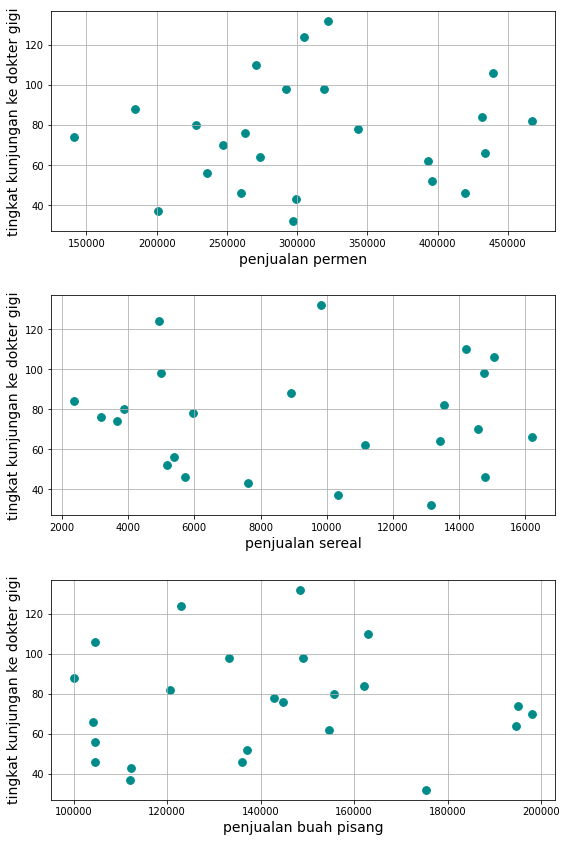

In [13]:
# Import matplotlib.pyplot sebagai alias
import matplotlib.pyplot as plt


# Kolom x adalah kolom dengan awalan penjualan
x_cols = df.columns[1:]

# Kolom y merupakan kolom tingkat kunjungan ke dokter gigi
y_col = "tingkat kunjungan ke dokter gigi"

# Buat visualisasi 
fig, axs = plt.subplots(len(x_cols), 1, figsize=(8,12))
for ax, x_col in zip(axs, x_cols):
    # Plotkan dengan scatter
    df.plot.scatter(x=x_col, y=y_col, c="darkcyan", s=60, ax=ax)
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.grid()
plt.tight_layout()
plt.show()

#### [Korelasi Penjualan Makanan dengan Kunjungan ke Dokter Gigi: Koefisien Korelasi Pearson](https://academy.dqlab.id/main/livecode/371/792/4118?pr=0)

In [14]:
print("Koefisien korelasi Pearson:")
print("---------------------------")
print(df.corr()["tingkat kunjungan ke dokter gigi"])

Koefisien korelasi Pearson:
---------------------------
tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64


#### [The Delayed Effect](https://academy.dqlab.id/main/livecode/371/792/4119?pr=0)

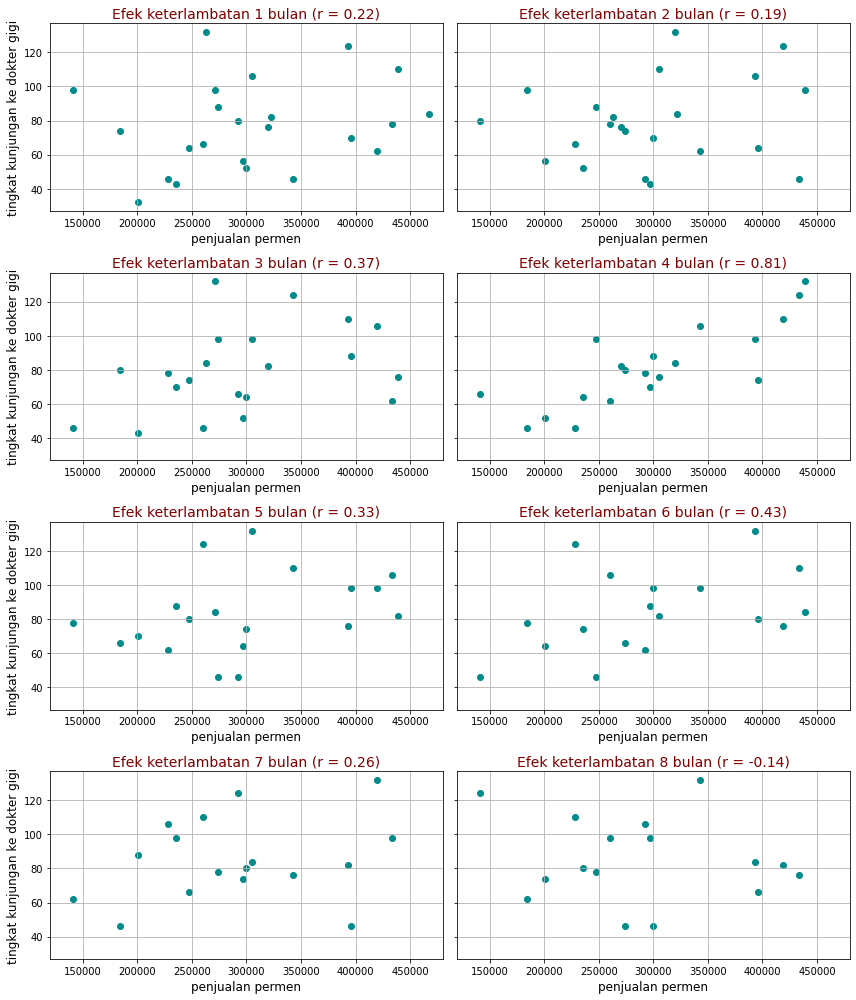

In [15]:
# import stats dari scipy
from scipy import stats


# Spesifikasi keterlambatan hingga 8 bulan
n_delays = 8

# Spesifikasi jumlah kolom untuk subplots
n_plt_cols = 2

fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(12, 3.5*round(n_delays/2)), sharey=True)

for i in range(n_delays):
    # Ingat: varibel bebas dan variabel bergantung harus memiliki ukuran yang sama
    # Ambilah variabel bebas: penjualan permen
    x = df["penjualan permen"][:-(i+1)]

    # Ambilah variabel bergantung: tingkat kunjungan ke dokter gigi dan implementasikan keterlambatan
    y = df["tingkat kunjungan ke dokter gigi"][i+1:]

    # Hitung koefisien korelasi Pearson
    pearson_r, p_value = stats.pearsonr(x, y)
    
    # Buat title setiap subplots dan juga tambatkan nilai  
    # koefisien korelasi Pearson yang telah dihitung
    title = "Efek keterlambatan %d bulan (r = %.2f)" % (i+1, pearson_r)
    
    # Buat scatter plot
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x, y, c="darkcyan")
    ax.set_title(title, fontsize=14, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("tingkat kunjungan ke dokter gigi", fontsize=12)
    ax.set_xlabel("penjualan permen", fontsize=12)
    ax.set_xlim([120000, 480000])
    ax.grid()

plt.tight_layout()
plt.show()

## Regresi Linier

#### [Menentukan Persamaan Linier](https://academy.dqlab.id/main/livecode/371/794/4121?pr=0)

In [16]:
# Import numpy sebagai aliasnya np
import numpy as np


# Ambillah variabel bebas dan bergantung df untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Hitunglah nilai rata-rata variabel bebas dan bergantung
x_mean = x.mean()
y_mean = y.mean()

# Hitung nilai pembilang dan penyebut untuk m
m_pembilang = ((x - x_mean) * (y - y_mean)).sum()
m_penyebut = ((x - x_mean)**2).sum()

# Hitung nilai koefisien regresi linier
m = m_pembilang / m_penyebut
b = y_mean - m * x_mean
print("Persamaan regresi linier: y = %.4e * x + %.4f" % (m, b))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341


#### [Prediksi Tingkat Kunjungan](https://academy.dqlab.id/main/livecode/371/794/4122?pr=0)

In [17]:
# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()

#  Gunakan x_new ke dalam persamaan regresi
y_pred = m * x_new + b
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


#### [Regresi Linier dengan Scikit-Learn](https://academy.dqlab.id/main/livecode/371/794/4125?pr=0)

In [18]:
# Importlah LinearRegression dari sklearn.linear_model
from sklearn.linear_model import LinearRegression


# Ambillah variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 2d narray melalui .reshape((-1,1))
x = df["penjualan permen"][:-4].to_numpy().reshape((-1,1))
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy().reshape((-1,1))

# Instansiasi LinearRegression ke dalam lr
lr = LinearRegression()

# Terapkan method fit pada variabel bebas dan bergantung
lr.fit(x,y)

# Ambillah butir data variabel bebas yang belum digunakan
# dan ubahlah menjadi numpy 2d narray melalui .reshape((-1,1))
x_new = df["penjualan permen"][-4:].to_numpy().reshape((-1,1))

# Prediksilah x_new dengan method predict
y_pred = lr.predict(x_new)

print("Persamaan regresi linier: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan[0])))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


## Mini Project

#### [Mini Project](https://academy.dqlab.id/main/livecode/371/793/4127?pr=0)

In [19]:
# Ambillah variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Penggunaan numpy.polyfit
print("Penggunaan numpy.polyfit:")
np_out = np.polyfit(x, y, 1)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (np_out[0], np_out[1]))

# Penggunaan stats.linregress
print("Penggunaan stats.linregress dari scipy:")
sclr_out = stats.linregress(x, y)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (sclr_out.slope, sclr_out.intercept))

# Gunakan salah satu nilai saja dari np_out atau sclr_out
# untuk koefisien regresi liniernya (gunakan sclr_out)

# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  Gunakan x_new ke dalam persamaan regresi linier
y_pred = sclr_out.slope * x_new + sclr_out.intercept
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))

Penggunaan numpy.polyfit:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Penggunaan stats.linregress dari scipy:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.
